# BeerMart Case Study - Anushka Kochar

In [20]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [21]:
rating = pd.read_csv("beer_data.csv")
rating.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


### Data Inspection

In [22]:
rating.shape

(475984, 3)

In [23]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


In [24]:
rating.describe()

,beer_beerid,review_overall
count,475984.000000,475984.000000
mean,21660.550611,3.814827
std,21793.437326,0.720411
min,3.000000,0.000000
25%,1716.000000,3.500000
50%,13892.000000,4.000000
75%,39397.000000,4.500000
max,77317.000000,5.000000


#### Missing values

Now, let us check for missing values, meaning all rows that do not have any ratings.

In [25]:
rating.dropna(inplace=True)

In [26]:
rating.shape

(475884, 3)

This means that our dataset had 100 rows with missing values.

#### Duplicate values

In [27]:
# Checking for duplicates
sum(rating.duplicated(subset = 'beer_beerid')) == 0

False

This means, that we have duplicate values in our dataset. Let us remove all those values.

In [28]:
rating.drop_duplicates(keep=False,inplace=True)

In [29]:
rating.shape

(474727, 3)

## Data Exploration

1. What are the unique values of ratings?

### Unique Values

We will filter out the data on the basis of distinct beer and it's reviews.

In [30]:
rating['beer_beerid'].nunique()

40294

In [31]:
beer_review_count = rating.groupby(['beer_beerid']).count()
beer_review_count.sort_values('review_overall', axis = 0, ascending = False, inplace = True, na_position ='last')
beer_review_count

,review_profilename,review_overall
beer_beerid,,
2093,973,973
412,969,969
1904,902,902
1093,842,842
92,816,816
4083,800,800
276,791,791
7971,780,780
88,756,756


In [32]:
beer_review_count.describe

<bound method NDFrame.describe of              review_profilename  review_overall
beer_beerid                                    
2093                        973             973
412                         969             969
1904                        902             902
1093                        842             842
92                          816             816
...                         ...             ...
38071                         1               1
38070                         1               1
38068                         1               1
38066                         1               1
77317                         1               1

[40294 rows x 2 columns]>

We see that the beer ratings vary from 1 to about 980, with beer 2093 having the highest number of ratings which is 973.

Now we will filter on the basis of distinct users.

In [33]:
rating['review_profilename'].nunique()

22494

In [34]:
user_review = rating.groupby(['review_profilename']).count()
user_review.sort_values('review_overall', axis = 0, ascending = False, inplace = True, na_position ='last')
user_review

,beer_beerid,review_overall
review_profilename,,
northyorksammy,1842,1842
mikesgroove,1375,1375
BuckeyeNation,1336,1336
Thorpe429,1072,1072
ChainGangGuy,1046,1046
NeroFiddled,1023,1023
womencantsail,1013,1013
brentk56,996,996
WesWes,977,977


We see that user 'northyorksammy' has the highest reviews, 1842 out of all the reviewers. 

Text(0, 0.5, 'Beer Reviews')

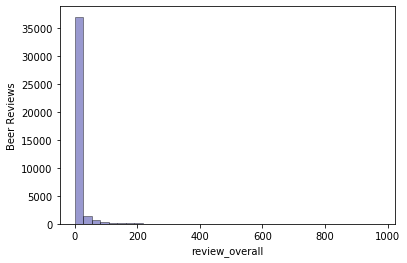

In [35]:
ax = sns.distplot(beer_review_count['review_overall'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Beer Reviews')

## Data Preparation
Choose only those beers that have at least N number of reviews.

Figure out an appropriate value of N using EDA; this may not have one correct answer, but you should not choose beers that have an extremely low number of ratings.


To avoid the cold start roble, we will select only those beers that have a good number of reviews and only those users that have actually reviwed beers. 

From our analysis, we see that there are many beers that have received only one rating. Let us calculate that number.

In [36]:
(beer_review_count['review_overall']==1).sum()

18064

Here, we see that 18064 or 44.8% of the total beers have only 1 review.

In [37]:
frequency_beer_review = beer_review_count.groupby(['review_overall']).count()
frequency_beer_review

,review_profilename
review_overall,
1,18064
2,6191
3,3069
4,1906
5,1344
6,957
7,792
8,557
9,471


Text(0, 0.5, 'Beer Reviews')

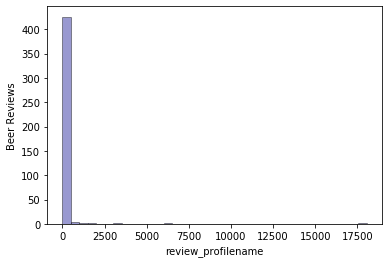

In [38]:
ax = sns.distplot(frequency_beer_review['review_profilename'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Beer Reviews')

We notice that there are a lot of beers that got very few reviews. To keep enhance the accuracy of our recommendation model, let us take only those beers with high number of reviews.

Let us create a dataset of these distinct beers each having more than 50 reviews.

In [39]:
fifty_review = beer_review_count[beer_review_count['review_overall']>=50]
print(fifty_review.shape)

(2065, 2)


In [40]:
fifty_review.head()

,review_profilename,review_overall
beer_beerid,,
2093,973,973
412,969,969
1904,902,902
1093,842,842
92,816,816


Text(0, 0.5, 'Beer Reviews')

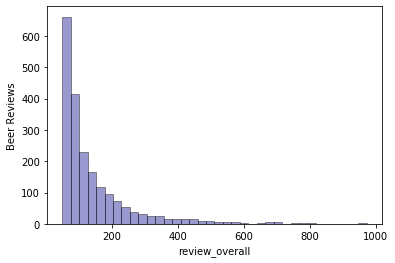

In [41]:
ax = sns.distplot(fifty_review['review_overall'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Beer Reviews')

Now, we see that many users have given only 1 review. 

In [42]:
(user_review['review_overall']==1).sum()

7973

Here, we see that 7973 or 35.4% of the users have given only one rating

In [43]:
frequency_user_review = user_review.groupby(['review_overall']).count()
frequency_user_review

,beer_beerid
review_overall,
1,7973
2,2949
3,1620
4,1109
5,841
6,649
7,497
8,428
9,377


Text(0, 0.5, 'User Reviews')

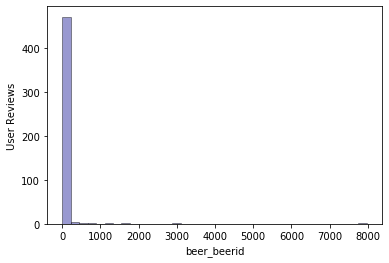

In [44]:
ax = sns.distplot(frequency_user_review['beer_beerid'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('User Reviews')

We notice that there are a lot of user that gave very few reviews. To keep enhance the accuracy of our recommendation model, let us take only those user who have given high number of reviews.

Let us create a dataset of these distinct users each giving more than 30 reviews.

In [45]:
thirty_review = user_review[user_review['review_overall']>=30]
print(thirty_review.shape)

(3176, 2)


In [46]:
thirty_review.head()

,beer_beerid,review_overall
review_profilename,,
northyorksammy,1842,1842
mikesgroove,1375,1375
BuckeyeNation,1336,1336
Thorpe429,1072,1072
ChainGangGuy,1046,1046


Text(0, 0.5, 'User Reviews')

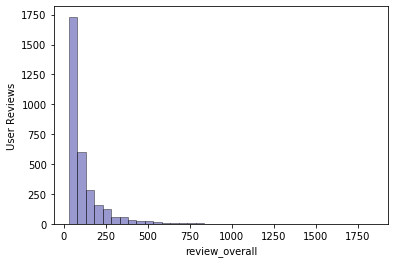

In [47]:
ax = sns.distplot(thirty_review['review_overall'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('User Reviews')

Now we will make our final dataset containing only the following entries:
1. Beers that recieved more than 50 reviews
2. Users that agve more than 30 reviews

In [48]:
fifty_review.reset_index()

,beer_beerid,review_profilename,review_overall
0,2093,973,973
1,412,969,969
2,1904,902,902
3,1093,842,842
4,92,816,816
5,4083,800,800
6,276,791,791
7,7971,780,780
8,88,756,756
9,1013,751,751


In [49]:
thirty_review.reset_index()

,review_profilename,beer_beerid,review_overall
0,northyorksammy,1842,1842
1,mikesgroove,1375,1375
2,BuckeyeNation,1336,1336
3,Thorpe429,1072,1072
4,ChainGangGuy,1046,1046
5,NeroFiddled,1023,1023
6,womencantsail,1013,1013
7,brentk56,996,996
8,WesWes,977,977
9,Phyl21ca,973,973


In [50]:
rating_new = rating[rating.beer_beerid.isin(fifty_review)]
rating_new

,beer_beerid,review_profilename,review_overall


In [51]:
fifty_copy = fifty_review.copy()

In [52]:
fifty_copy.drop(['review_profilename', 'review_overall'], axis=1)

""
beer_beerid
2093
412
1904
1093
92
4083
276
7971
88


In [75]:
rating_new = pd.merge(left=rating,right=fifty_copy, left_on='beer_beerid', right_on='beer_beerid')

KeyError: 'beer_beerid'

In [78]:
fifty_copy.reset_index()
fifty_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 2093 to 814
Data columns (total 2 columns):
review_profilename    2065 non-null int64
review_overall        2065 non-null int64
dtypes: int64(2)
memory usage: 48.4 KB


In [80]:
rating_new = pd.merge(rating,fifty_copy, on=['beer_beerid'])

KeyError: 'beer_beerid'